# Le Benin, déclaration d'âges

#### Préambule

USAID est un organisme public Américain qui développe un programme nommé DHS, visant à collecter des données relatives à la démographie et la santé dans les pays en développement.

Une enquête a été menée au Bénin auprès de femmes âgées de 15 à 49 ans.

Le fichier 'Benin.csv' recense pour chaque femme interrogée:

- L'année de naissance déclarée par celle-ci
- Le numéro du mois de naissance déclaré par celle-ci
- L'année durant laquelle elle a été interrogée
- Le numéro du mois durant lequel elle a été interrogée
- L'âge calculé à partir de sa déclaration

#### Objectif :
- Etudier la distribution des âges déclarés

## Etape 1 : Data visualisation de la variable age

In [1]:
import pandas as pd
import pylab as pl
pl.style.use('bmh')

T = pd.read_csv('data/Benin.csv')
T.head()

,m_interview,a_interview,m_naissance,a_naissance,age,etude
0,10,2001,7,1976,25,0
1,10,2001,7,1976,25,0
2,10,2001,11,1964,36,0
3,10,2001,11,1964,36,0
4,10,2001,11,1964,36,0


In [9]:
S = T['age'].value_counts()
S

35    1508
40    1412
30    1292
45    1284
25     988
32     881
38     868
28     778
48     651
36     643
42     641
37     636
33     587
39     559
41     541
43     538
27     516
47     485
26     484
31     483
46     419
44     419
29     416
34     389
22     335
20     325
49     321
24     307
23     277
21     177
18      94
19      92
17      26
16      16
15      10
Name: age, dtype: int64

In [3]:
S.sort_index()
# On tri dans l'ordre croissant les âges de la population

15      10
16      16
17      26
18      94
19      92
20     325
21     177
22     335
23     277
24     307
25     988
26     484
27     516
28     778
29     416
30    1292
31     483
32     881
33     587
34     389
35    1508
36     643
37     636
38     868
39     559
40    1412
41     541
42     641
43     538
44     419
45    1284
46     419
47     485
48     651
49     321
Name: age, dtype: int64

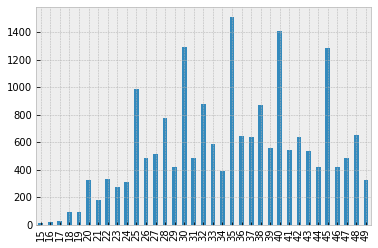

In [4]:
A = S.sort_index()
A.plot(kind='bar')
pl.show()

On voit que la plupart des âges recencés sont des multiples de 5 (25, 30, 35, 40, 45)

## Etape 2 : Effet des études

La variable 'etude' concerne le niveau d'étude de la femme interrogée : 

- 0 = pas scolarisée
- 1 = primaire
- 2 = secondaire
- 3 = universitaire

#### Création d'une nouvelle variable nommée multiple

In [5]:
def multiple_5(age):
    if age%5 == 0:
        return 1
    else:
        return 0

In [6]:
T['multiple'] = T['age'].apply(multiple_5)
T.head()

,m_interview,a_interview,m_naissance,a_naissance,age,etude,multiple
0,10,2001,7,1976,25,0,1
1,10,2001,7,1976,25,0,1
2,10,2001,11,1964,36,0,0
3,10,2001,11,1964,36,0,0
4,10,2001,11,1964,36,0,0


#### Regroupement des données

In [7]:
T.query('etude == 0').mean()

m_interview       9.234203
a_interview    2001.000000
m_naissance       6.595972
a_naissance    1965.255728
age              35.484846
etude             0.000000
multiple          0.368438
dtype: float64

Il y a environ 37% de femmes qui ont un âge égal à un multiple de 5 qui n'ont pas fait d'étude

In [8]:
T.groupby('etude').mean()

,m_interview,a_interview,m_naissance,a_naissance,age,multiple
etude,,,,,,
0,9.234203,2001.0,6.595972,1965.255728,35.484846,0.368438
1,9.182313,2001.0,6.622236,1966.696892,34.016021,0.298943
2,9.294450,2001.0,6.508937,1965.990593,34.790216,0.276576
3,9.579710,2001.0,6.405797,1959.304348,41.449275,0.173913


On voit que la fréquence de femmes ayant un âge égal à un multiple de 5 est la plus élevée dans la catégorie des femmes qui n'ont pas fait d'étude.
Cependant un âge multiple de 5 n'indique pas spécialement le niveau d'étude de la femme.
Elles ont juste 'arrondis' leurs âges